In [89]:
import pandas as pd 
import matplotlib.pyplot as plt

In [90]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import DataEngineeringLibrary as dlib

In [91]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframeLondonUTD19 = dlib.loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [92]:
# Drop the error column, because it is not needed
dataframeLondonUTD19 = dlib.preprocess_dataframe(dataframeLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [93]:
#Calculate the speed using the formula speed = flow / occupancy
dataframeLondonUTD19 = dlib.calculate_traffic_speed(dataframeLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


In [94]:
dataframeLondonUTD19 = dlib.drop_outliers(dataframeLondonUTD19, column='traffic', group_by_detid=True)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000


In [95]:
dataframeLondonUTD19Clean = dlib.dropFalseValues(dataframeLondonUTD19, column='traffic', outlier_factor=3)
dataframeLondonUTD19Clean.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992
2,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999
3,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000
4,2015-05-16,1500,CNTR_N00/005x1,612.0,0.094167,london,Saturday,57.629991


In [96]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframeLondonUTD19['detid'].unique()
print(num_unique_detid.size)

160


In [97]:
dataframeLondonUTD19, anomlies = dlib.detect_anomalies(dataframeLondonUTD19, column='traffic', minIQR=5, minDataPoints=5000)
print(anomlies.size)

Anomalies detected based on IQR: 2
Anomalies detected based on IQR too small: 25
Anomalies detected based on not enough data: 13
37


In [98]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframeLondonUTD19['detid'].unique()
print(num_unique_detid.size)

123


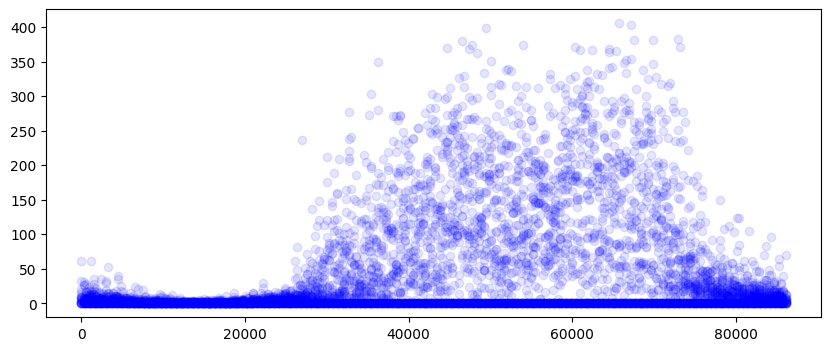

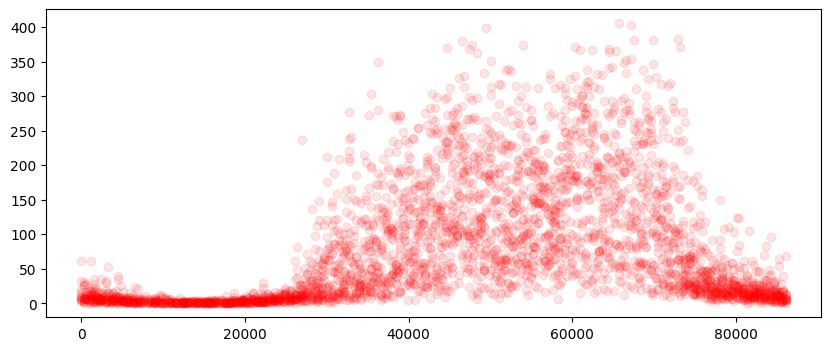

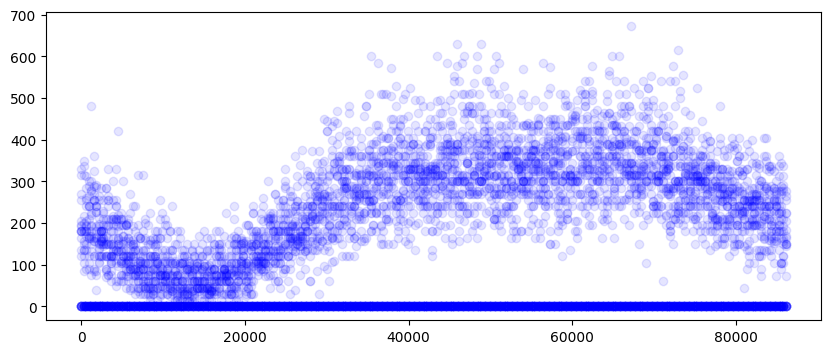

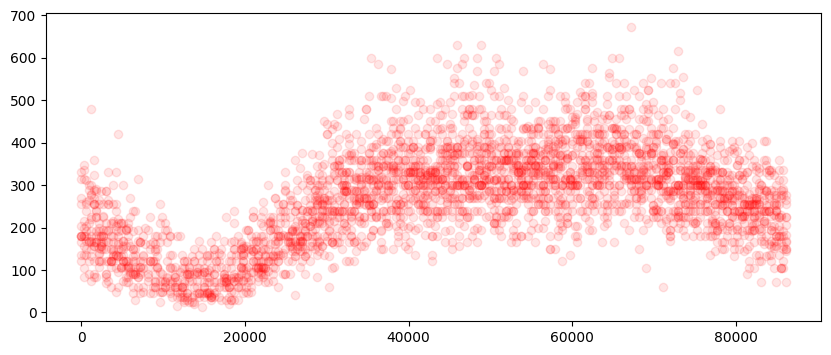

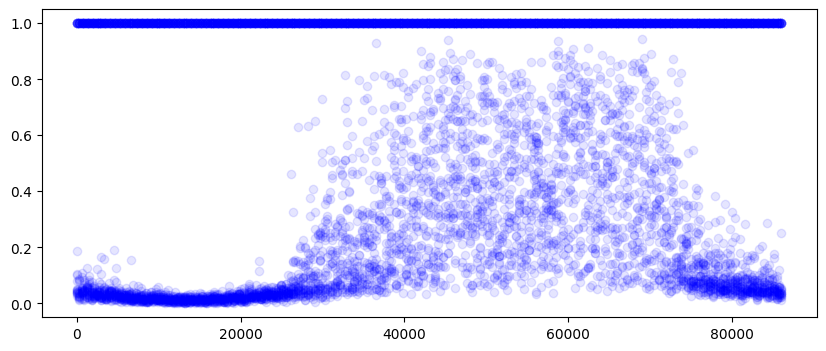

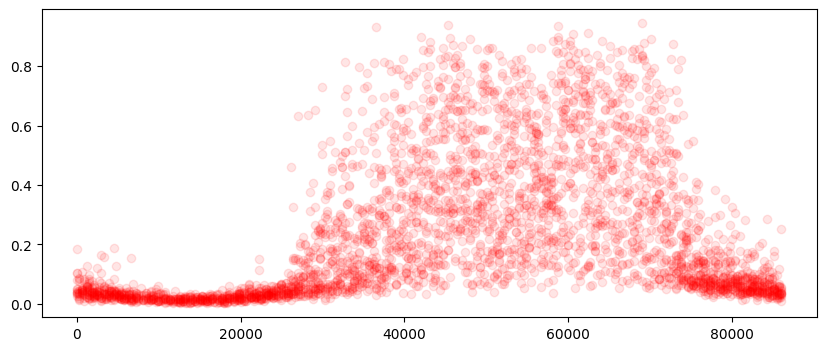

In [99]:
#Plot the speed, traffic and occ of a random detector
dataframeDetector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N17/121b1']
dataframeDetectorClean = dataframeLondonUTD19Clean[dataframeLondonUTD19Clean['detid'] == 'EAST_N17/121b1']
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetectorClean['interval'], dataframeDetectorClean['traffic'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['flow'], alpha=0.1, color='blue')                                  
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetectorClean['interval'], dataframeDetectorClean['flow'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['occ'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetectorClean['interval'], dataframeDetectorClean['occ'], alpha=0.1, color='red')
plt.show()

In [100]:
dataframeLondonUTD19= dataframeLondonUTD19Clean

In [101]:
# select a random detector
unique_detectors = dataframeLondonUTD19['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
dataframe_random_detector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == random_detector]
print(f"Selected detector: {random_detector}")
dataframe_random_detector.head()

Selected detector: CNTR_N02/223d1


,day,interval,detid,flow,occ,city,weekday,traffic
412022,2015-05-16,0,CNTR_N02/223d1,432.0,0.116667,london,Saturday,50.399997
412023,2015-05-16,300,CNTR_N02/223d1,444.0,0.120833,london,Saturday,53.650006
412024,2015-05-16,600,CNTR_N02/223d1,348.0,0.090833,london,Saturday,31.609995
412025,2015-05-16,900,CNTR_N02/223d1,408.0,0.122500,london,Saturday,49.980003
412026,2015-05-16,1500,CNTR_N02/223d1,288.0,0.076667,london,Saturday,22.079998


Special random detectors 
- EAST_N17/121b1
- CNTR_N01/067k1
- CNTR_N01/009u1

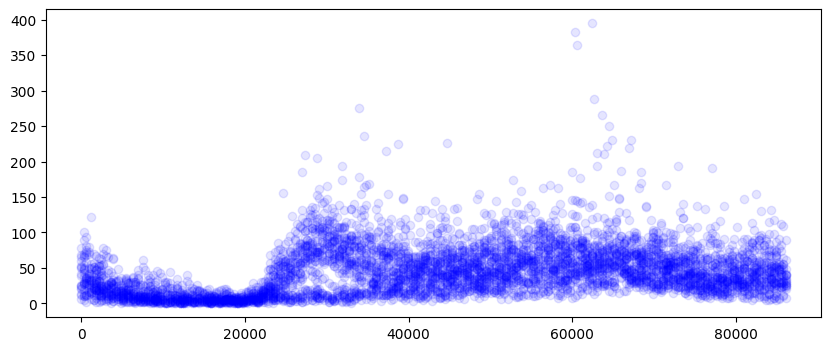

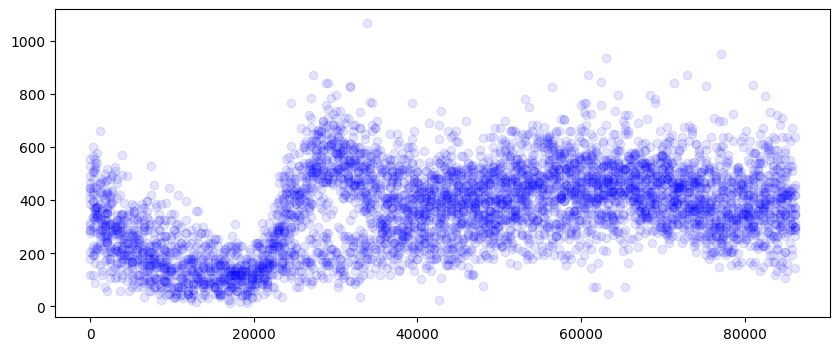

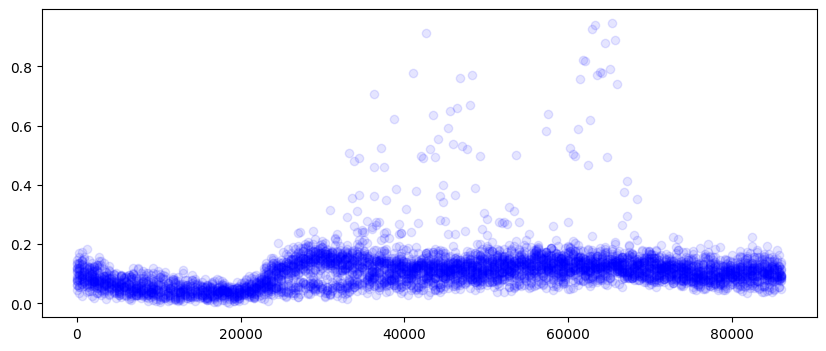

In [102]:
#Plot the speed, traffic and occ of a random detector
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['occ'], alpha=0.1, color='blue')
plt.show()

In [103]:
# Select a random day
unique_days = dataframe_random_detector['weekday'].unique()
random_day = pd.Series(unique_days).sample(1).iloc[0]
dataframe_random_day = dataframe_random_detector[dataframe_random_detector['weekday'] == random_day]
print(f"Selected day: {random_day}")
dataframe_random_day.head()

Selected day: Thursday


,day,interval,detid,flow,occ,city,weekday,traffic
413216,2015-05-21,0,CNTR_N02/223d1,384.00000,0.105833,london,Thursday,40.640003
413217,2015-05-21,300,CNTR_N02/223d1,432.00000,0.115000,london,Thursday,49.680006
413218,2015-05-21,900,CNTR_N02/223d1,540.00000,0.148333,london,Thursday,80.100000
413219,2015-05-21,1200,CNTR_N02/223d1,264.00000,0.066667,london,Thursday,17.600000
413220,2015-05-21,1800,CNTR_N02/223d1,352.94118,0.098186,london,Thursday,34.653979


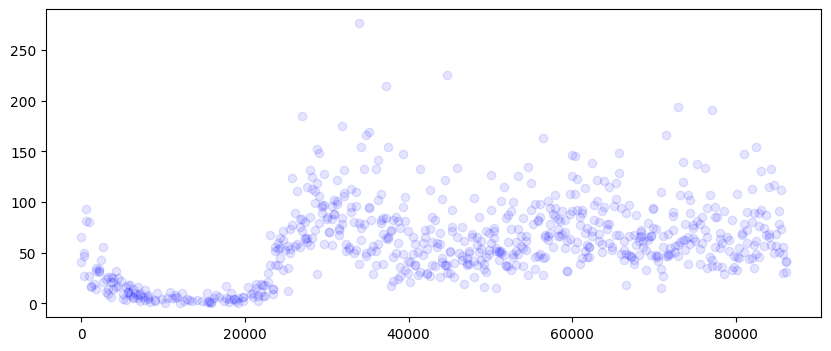

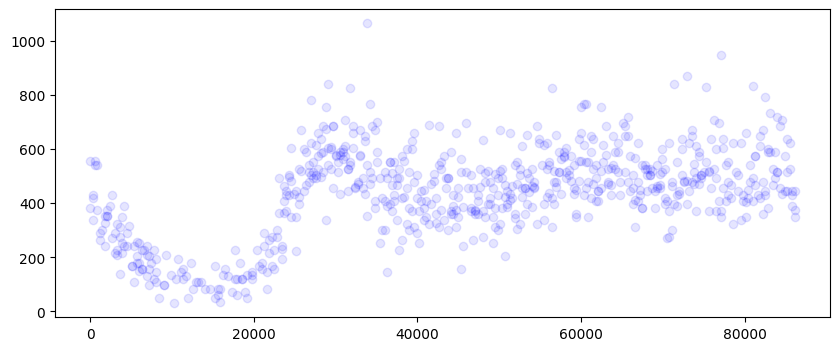

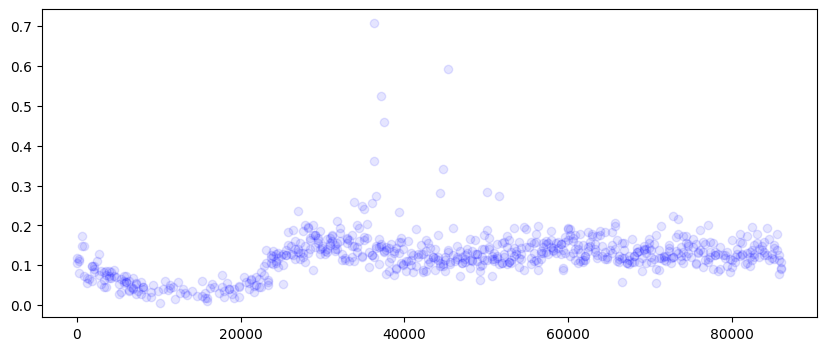

In [104]:
#Plot the speed, traffic an occ of a random detector on a random day
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['occ'], alpha=0.1, color='blue')
plt.show()

In [105]:
dataframeLondonUTD19Mean = dataframeLondonUTD19.copy()
dataframeLondonUTD19Mean['interval'] = (dataframeLondonUTD19Mean['interval'] / 1500).round() * 1000
dataframeLondonUTD19Mean.head(20)

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0.0,CNTR_N00/005x1,840.00000,0.110000,london,Saturday,92.400000
1,2015-05-16,0.0,CNTR_N00/005x1,564.00000,0.096667,london,Saturday,54.519992
2,2015-05-16,1000.0,CNTR_N00/005x1,816.00000,0.104167,london,Saturday,84.999999
3,2015-05-16,1000.0,CNTR_N00/005x1,864.00000,0.110000,london,Saturday,95.040000
4,2015-05-16,1000.0,CNTR_N00/005x1,612.00000,0.094167,london,Saturday,57.629991
5,2015-05-16,1000.0,CNTR_N00/005x1,595.03448,0.081034,london,Saturday,48.218307
6,2015-05-16,1000.0,CNTR_N00/005x1,597.47368,0.078640,london,Saturday,46.985542
7,2015-05-16,2000.0,CNTR_N00/005x1,590.03390,0.086963,london,Saturday,51.311286
8,2015-05-16,2000.0,CNTR_N00/005x1,468.00000,0.072500,london,Saturday,33.929997
9,2015-05-16,2000.0,CNTR_N00/005x1,868.55172,0.135345,london,Saturday,117.553971


In [106]:
grouped_mean = dataframeLondonUTD19Mean.groupby(['interval', 'day', 'detid', 'weekday']).mean('traffic').reset_index()
grouped_mean.head()


,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N00/005x1,Friday,724.0,0.103889,75.786667
1,0.0,2015-05-15,CNTR_N00/005x2,Friday,612.0,0.089167,55.120000
2,0.0,2015-05-15,CNTR_N01/007a1,Friday,396.0,0.409444,165.286666
3,0.0,2015-05-15,CNTR_N01/007c1,Friday,436.0,0.402778,178.349999
4,0.0,2015-05-15,CNTR_N01/007z1,Friday,740.0,0.281667,208.236657


In [111]:
grouped_mean = dataframeLondonUTD19.copy()
grouped_mean = dlib.combineDatapoints(grouped_mean, ratio= 1500)
grouped_mean.head()

,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N00/005x1,Friday,724.0,0.103889,75.786667
1,0.0,2015-05-15,CNTR_N00/005x2,Friday,612.0,0.089167,55.120000
2,0.0,2015-05-15,CNTR_N01/007a1,Friday,396.0,0.409444,165.286666
3,0.0,2015-05-15,CNTR_N01/007c1,Friday,436.0,0.402778,178.349999
4,0.0,2015-05-15,CNTR_N01/007z1,Friday,740.0,0.281667,208.236657


Selected detector: CNTR_N12/011e1


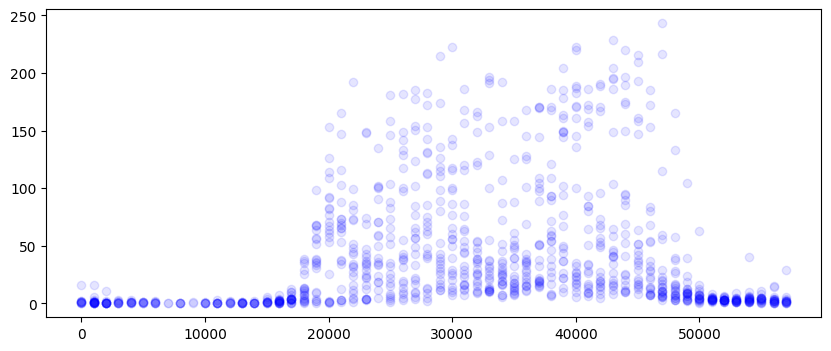

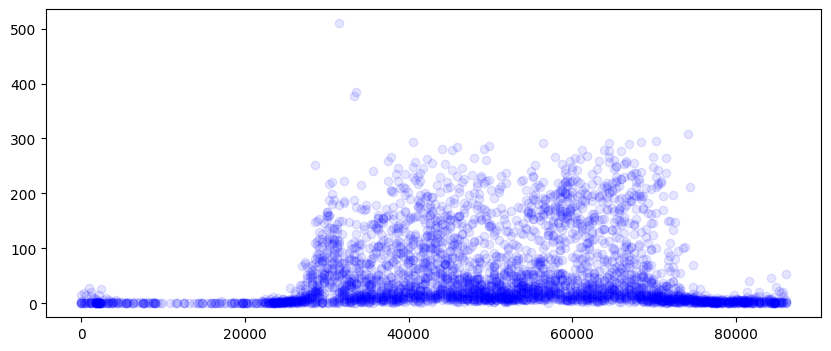

In [112]:
unique_detectors = grouped_mean['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
print(f"Selected detector: {random_detector}")
dataframeDetector = grouped_mean[grouped_mean['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['traffic'], alpha=0.1, color='blue')
plt.show()
dataframeDetector = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframeDetector['interval'], dataframeDetector['traffic'], alpha=0.1, color='blue')
plt.show()

